In [2]:
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import os
import glob
def textfile():
    files = glob.glob("./files/*.txt")
    return files
textfile=textfile()
textfile

['./files\\2884105kam.txt',
 './files\\2884106kam.txt',
 './files\\2890105kam.txt',
 './files\\2890106kam.txt',
 './files\\2891105kam.txt',
 './files\\2891106kam.txt']

In [4]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山','整體','款項','揭露','資訊']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\H77-D3H\AppData\Local\Temp\jieba.cache
Loading model cost 0.779 seconds.
Prefix dict has been built succesfully.


In [5]:
stopwords = ['我', '對', '採用', '如下', '個體','10', '五年',  '相關','六年','部分','企業','之','於','註','係','民國','至','105.12','千元','資產','三十一日','期','負債','年','價值','按','7','12','有','年報','十二月','106.12','本集團','期間','計','所','集團','人','其','合','併','報導','等','已','時','100.00%','新','明','續','該','日','6','外','報告','股','財務','除','附','附錄','予','者','第','另','年度','本','○','臺','31','一','幣','後','大同','及','與','公司','單位','報表','公','司','為','月','有限公司','106','以','1','或','其他','金額','臺幣','1','2','3','4','5','000','認列','衡量','\n']
puncs = '！？｡/＂＃＄$％＆＇()（）( , )＊＋，_－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》.%「」『』【】 〔〕〖〗〘〙〚〛-〜,〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

In [6]:
corpus = []
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r')
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    for w in r_list:
        if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
            r_list.remove(w)        
    st=" ".join(r_list)
    corpus.append(st)
corpus

['關鍵 查核 事項 關鍵 查核 事項 指 依本會 計師 專業 判斷 玉山 金融 控股 股份 及其 子公司 財務報表 查核 最為 重要 之事項 事項 查核 財務報表 整體 形成 查核 意見 過程 中 予以 因應 本會 計師 並不對 事項 單獨 表示 意見 茲 玉山 金融 控股 股份 及其 子公司 合 財務報表 關鍵 查核 事項 敘明 放款 備 抵呆帳 \u3000 玉山 金融 控股 股份 及其 子公司 主要 營運 活動 放款 業務 截至 年月日 止 貼現 放款 之淨額 新 幣 , 仟元 佔合 財務報表 總資產 對合 財務報 表 整體 屬 重大 貼現 放款 減損 評估 管理 階層 每月 複 核 放款 組合以 評估 減損 決定 是否 減損 損失 主要 判斷 是否 任何 可觀察證 據 顯示 可能 產生 減損 減損 損失 該 帳面 估計 未來 現金 流量 已 反映 擔保品 保證 影響 按該 金融 原始 有效 利率 折現 現值間 差額 並且 需要 符合 主管 機關 備 抵呆帳 提列 法令 規定 放款 減損 損失 藉由 備 抵呆帳 調降 帳面 放款 備 抵呆帳 帳面 變動 認列 損益 有關 放款 減損評 估之會計 政策 資訊 請 參 閱合 併 財務報表 註 四 五及 十二 由 於 評估 放款 減損 涉及 會計 估計 管理 階層 假設 重大 判斷 因此 列為 年度 關鍵 查核 事項 \u3000 \u3000 本會 計師針 上 開關鍵 查核 事項 敘明 特定 層面 已 執行 主要 因應 程序 彙 列 ： 瞭解 測試 公司 評估 放款 減損 攸關 內部 控制 作業 程序 自個 別 評估 減損 放款 案件 選取 樣本 評估 未來 現金 流量 預測 假設 持有 擔保品價 \n 值 合理性 \n . 對 於 組合 評估 減損 放款 案件 瞭解 測試 減損 模型 使用 之假設 重要 參數 減損發 \n             生率 回收率 是否 反映 各 放款 組合 實際 狀況 \n   . 測試 授信 分類 以評 估備 抵呆帳 提列 是否 符合 主管 機關 法令 規定 要求 \n   \n 商譽 減損 測試 \n \u3000 \u3000 公司 管理 階層 係 以 每 年度 基礎執 行商 譽 減損 測試 執 行商 譽減 損測 試時 需估 計商譽 \n 分攤 至現 金產生 使用 為 計算

In [7]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  443


In [8]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (6, 443)


<6x443 sparse matrix of type '<class 'numpy.float64'>'
	with 1243 stored elements in Compressed Sparse Row format>

In [9]:
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)            

----Document 0----
主管 0.06057919583617728 0 18
主要 0.09065537491348101 0 19
事項 0.20397459355533226 0 44
五及 0.08373374005513662 0 47
估之會計 0.051056267875038495 0 56
估計 0.09065537491348101 0 63
使用 0.11331921864185127 0 69
假設 0.11331921864185127 0 77
公司 0.06057919583617728 0 85
列為 0.08373374005513662 0 100
判斷 0.09065537491348101 0 101
及其 0.09086879375426592 0 123
反映 0.06057919583617728 0 127
商譽 0.07847247193979182 0 141
因應 0.06799153118511075 0 145
因此 0.06057919583617728 0 147
執行 0.06799153118511075 0 151
子公司 0.06799153118511075 0 163
層面 0.08373374005513662 0 179
帳面 0.12560061008270493 0 183
年度 0.09086879375426592 0 185
抵呆帳 0.11331921864185127 0 207
控股 0.06799153118511075 0 217
損失 0.06799153118511075 0 225
擔保品價 0.051056267875038495 0 233
放款 0.2946299684688133 0 237
敘明 0.09086879375426592 0 241
是否 0.09065537491348101 0 246
會計 0.06057919583617728 0 250
有關 0.06057919583617728 0 252
本會 0.06799153118511075 0 256
查核 0.22663843728370253 0 257
案件 0.06057919583617728 0 258
機關 0.06057919583617728 0 2

因應 0.05286596515252709 5 145
執行 0.07929894772879063 5 151
報告 0.09765918431356775 5 155
子公司 0.06608245644065885 5 163
定性 0.052990421016402736 5 166
抽樣 0.07324438823517582 5 208
控股 0.07929894772879063 5 217
揭露 0.052990421016402736 5 224
收款 0.14648877647035163 5 235
放款 0.0925154390169224 5 237
方法 0.07929894772879063 5 244
是否 0.07929894772879063 5 246
有關 0.07065389468853697 5 252
未來 0.05286596515252709 5 253
本會 0.10573193030505418 5 256
查核 0.29076280833889895 5 257
模型 0.05286596515252709 5 260
減損 0.14538140416944947 5 279
測試 0.07065389468853697 5 284
準備 0.12207398039195969 5 285
當局 0.17090357254874355 5 310
程序 0.07929894772879063 5 324
符合 0.06608245644065885 5 325
管理 0.1321649128813177 5 328
精算 0.14648877647035163 5 329
股份 0.07929894772879063 5 340
計師 0.11894842159318594 5 358
計算 0.05286596515252709 5 362
評估 0.29076280833889895 5 366
評價 0.10598084203280547 5 367
詳合 0.21973316470552742 5 371
說明 0.12207398039195969 5 375
財務 0.1525382240512832 5 381
部位 0.09765918431356775 5 409
重要 0.079298947

In [10]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif
0,一致性,0.000000,0.000000,0.044569,0.045305,0.000000,0.000000
1,三十,0.000000,0.000000,0.000000,0.000000,0.020276,0.024415
2,三十一日,0.000000,0.000000,0.000000,0.000000,0.020276,0.024415
3,上述,0.000000,0.000000,0.064489,0.065554,0.073346,0.070654
4,不同,0.000000,0.000000,0.000000,0.000000,0.040552,0.048830
5,不確,0.000000,0.000000,0.064489,0.065554,0.044007,0.035327
6,並不對,0.022664,0.022417,0.024127,0.024525,0.010976,0.013216
7,並且,0.041867,0.041411,0.000000,0.000000,0.000000,0.000000
8,並以,0.000000,0.000000,0.044569,0.045305,0.000000,0.000000
9,並抽樣,0.000000,0.000000,0.000000,0.000000,0.020276,0.024415


In [12]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [9]:
tfarray=tfidf.toarray()

In [10]:
tfarray.shape

(6, 443)

In [11]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_count'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_count,doc2_count,doc3_count,doc4_count,doc5_count,doc6_count
0,一致性,0,0,1,1,0,0
1,三十,0,0,0,0,1,1
2,三十一日,0,0,0,0,1,1
3,上述,0,0,2,2,5,4
4,不同,0,0,0,0,2,2
5,不確,0,0,2,2,3,2
6,並不對,1,1,1,1,1,1
7,並且,1,1,0,0,0,0
8,並以,0,0,1,1,0,0
9,並抽樣,0,0,0,0,1,1


In [13]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

NameError: name 'df' is not defined

# 全部文字的dict建立文字雲

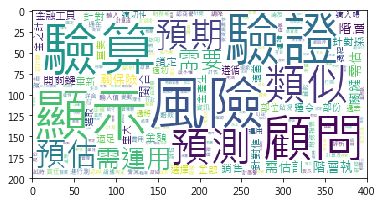

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allcount=vec.vocabulary_

font = r"D:\python\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\Microsoft JhengHei.ttf"
wordcloud = WordCloud(font_path=font,background_color="white")
wordcloud.fit_words(allcount)
plt.imshow(wordcloud)

In [20]:
ten = sorted(allcount.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('驗證', 442),
 ('驗算', 441),
 ('風險', 440),
 ('顯示', 439),
 ('顧問', 438),
 ('類似', 437),
 ('預測', 436),
 ('預期', 435),
 ('預估', 434),
 ('需運用', 433)]

([<matplotlib.axis.XTick at 0xf91c240>,
 <a list of 10 Text xticklabel objects>)

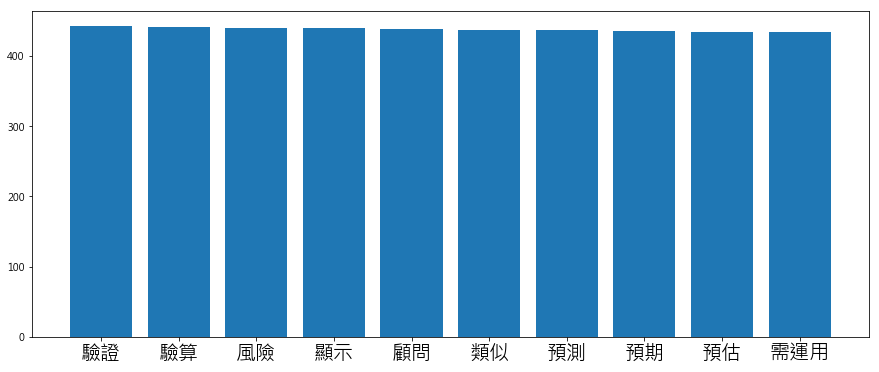

In [15]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])
    
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)

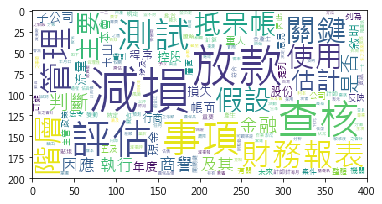

In [30]:
tfidf_dict1=dict(zip(df.words, df.doc1_count))
tfidf_dict1
wordcloud = WordCloud(font_path=font,background_color="white")
wordcloud.fit_words(tfidf_dict1)
plt.imshow(wordcloud)

In [31]:
ten = sorted(tfidf_dict1.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('減損', 17),
 ('放款', 13),
 ('查核', 10),
 ('評估', 10),
 ('事項', 9),
 ('測試', 8),
 ('管理', 7),
 ('財務報表', 6),
 ('關鍵', 6),
 ('階層', 6)]

([<matplotlib.axis.XTick at 0x10240358>,
 <a list of 10 Text xticklabel objects>)

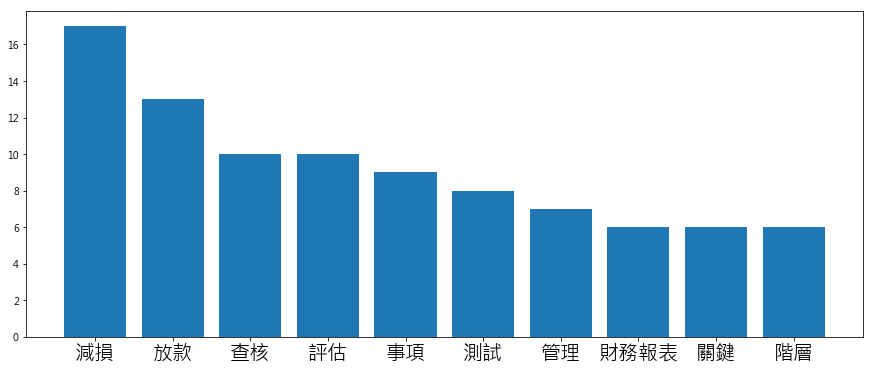

In [22]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])
    
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)

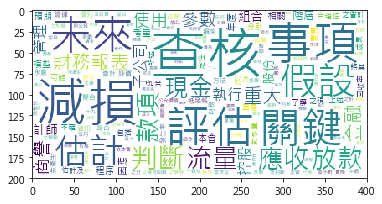

In [24]:
tfidf_dict3=dict(zip(df.words, df.doc3_count))
tfidf_dict3
wordcloud = WordCloud(font_path=font,background_color="white")
wordcloud.fit_words(tfidf_dict3)
plt.imshow(wordcloud)

In [25]:
ten = sorted(tfidf_dict3.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('查核', 13),
 ('減損', 11),
 ('事項', 9),
 ('評估', 8),
 ('未來', 7),
 ('關鍵', 7),
 ('假設', 6),
 ('估計', 5),
 ('判斷', 5),
 ('應收', 5)]

([<matplotlib.axis.XTick at 0x102fb470>,
 <a list of 10 Text xticklabel objects>)

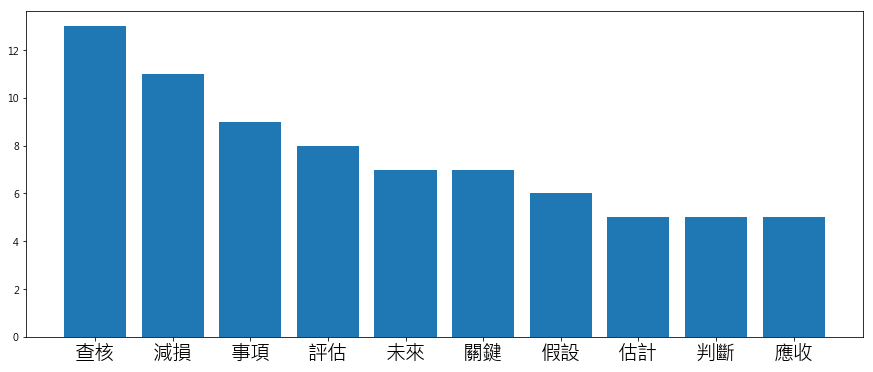

In [26]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])
    
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)

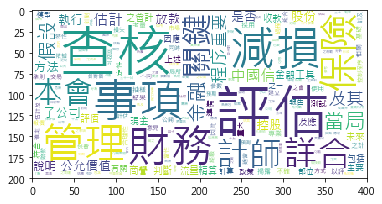

In [27]:
tfidf_dict5=dict(zip(df.words, df.doc5_count))
tfidf_dict5
wordcloud = WordCloud(font_path=font,background_color="white")
wordcloud.fit_words(tfidf_dict5)
plt.imshow(wordcloud)

In [28]:
ten = sorted(tfidf_dict5.items(), key=lambda x: x[1],reverse = True)
ten[:10]

[('評估', 29),
 ('查核', 27),
 ('事項', 17),
 ('減損', 17),
 ('財務', 15),
 ('管理', 14),
 ('保險', 13),
 ('詳合', 12),
 ('計師', 11),
 ('關鍵', 11)]

([<matplotlib.axis.XTick at 0x105ee358>,
 <a list of 10 Text xticklabel objects>)

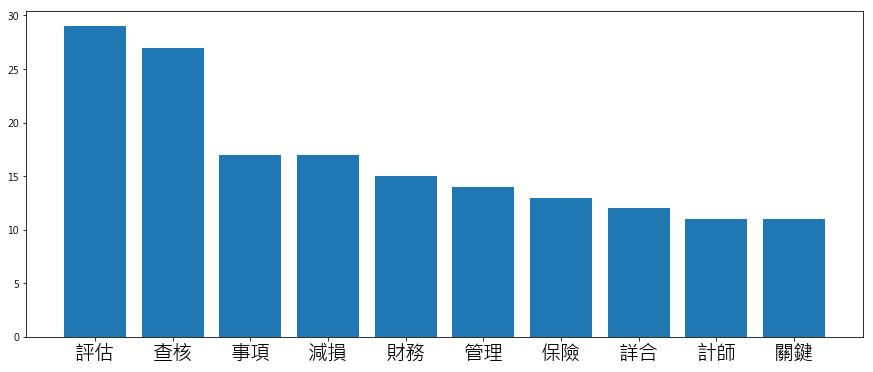

In [29]:
data = []
for t in ten[:10]:
    data.append(t[1])
label = []
for t in ten[:10]:
    label.append(t[0])
    
plt.figure(figsize=(15,6))
plt.bar(range(0,10),data)
plt.xticks(range(0,10),label,fontsize=20)